In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
pd.set_option('display.max_rows', 181)

### Analysing the Ecounter data

In [58]:
encounters = pd.read_csv("encounters.csv")

In [59]:
encounters.head()

,Id,START,STOP,PATIENT,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,07f79686-f630-48db-a167-b45178729f27,2000-09-28T09:26:00Z,2000-09-28T09:41:00Z,2d0a9468-9cc7-47c6-a757-2944fb7a754d,55dde950-4abf-3cb7-9b3f-12a1cc328e1d,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,wellness,410620009,Well child visit (procedure),129.16,129.16,59.16,NaN,NaN
1,670774f5-c7cd-466e-a00e-477cdd14ef94,1992-03-27T20:17:54Z,1992-03-27T20:47:54Z,600960a6-6ed0-4bc3-8476-1143c592ea66,f7f2c1c3-1dd0-34e7-beb2-a15e57ea6c4e,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,wellness,410620009,Well child visit (procedure),129.16,129.16,74.16,NaN,NaN
2,7e6e83d8-265a-4d81-9b08-ff6e452b53d7,1971-04-12T06:29:48Z,1971-04-12T06:44:48Z,c51d1f1e-8c6f-49d5-bd9d-871402b8cfef,9c59ac35-6736-37d9-98a2-97dded98111e,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,wellness,410620009,Well child visit (procedure),129.16,129.16,59.16,NaN,NaN
3,a02c00f0-dc50-4174-a095-234c221350c7,1964-02-06T16:30:30Z,1964-02-06T16:45:30Z,360a1024-645a-4c50-b94c-1689b34beace,b085288a-8635-3cda-b75a-ba173f2fc961,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,129.16,49.16,NaN,NaN
4,4548cd8e-7578-46b5-8028-2b2164b00b6d,1993-04-29T20:17:54Z,1993-04-29T20:32:54Z,2d0a9468-9cc7-47c6-a757-2944fb7a754d,c44f361c-2efb-3050-8f97-0354a12e2920,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,ambulatory,185345009,Encounter for symptom,129.16,129.16,59.16,444814009.0,Viral sinusitis (disorder)


In [60]:
encounters.describe()

,CODE,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE
count,1.414254e+06,1.414254e+06,1.414254e+06,1.414254e+06,4.636550e+05
mean,2.378803e+10,1.286541e+02,1.286541e+02,5.398522e+01,1.325800e+12
std,1.974365e+13,5.087456e+00,5.087456e+00,3.668684e+01,1.252508e+13
min,2.229801e+07,7.749000e+01,7.749000e+01,0.000000e+00,1.734006e+06
25%,1.853450e+08,1.291600e+02,1.291600e+02,2.916000e+01,7.289200e+07
50%,3.083350e+08,1.291600e+02,1.291600e+02,5.916000e+01,7.289200e+07
75%,4.106200e+08,1.291600e+02,1.291600e+02,6.916000e+01,1.956620e+08
max,1.660261e+16,1.291600e+02,1.291600e+02,1.291600e+02,3.685810e+14


### Different reasons for patients to visit hospital

In [61]:
encounters['ENCOUNTERCLASS'].value_counts()
visit_reasons = encounters['ENCOUNTERCLASS'].value_counts().index
reason_cnts = encounters['ENCOUNTERCLASS'].value_counts().values

[]

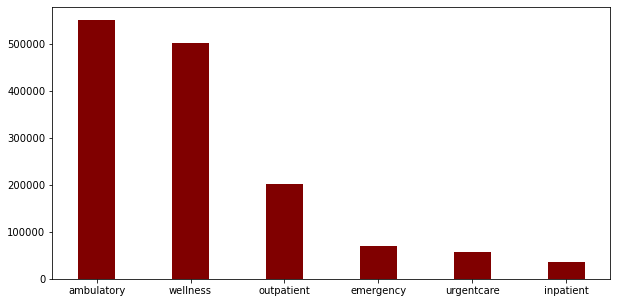

In [62]:
plt.figure(figsize=[10,5])
plt.bar(visit_reasons, reason_cnts, color='maroon', width=.4)
plt.plot()

### How many encounters does a patient have

In [63]:
encounter_cnt = encounters.groupby('PATIENT')['PATIENT'].count().sort_values(ascending=False)

 Top 50 encounter counts

<BarContainer object of 50 artists>

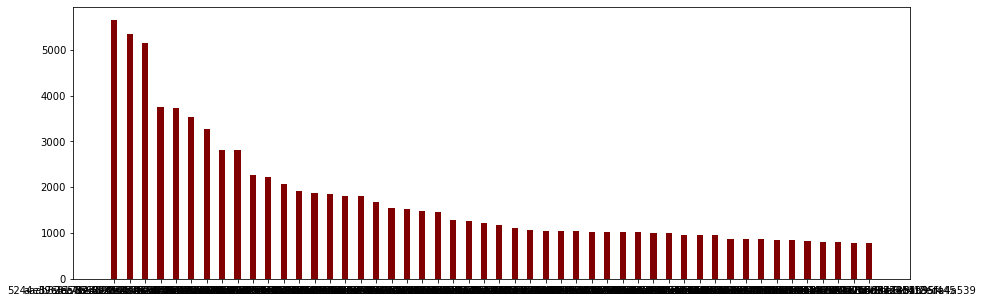

In [64]:
plt.figure(figsize=(15,5))
plt.bar(encounter_cnt.iloc[0:50].index, encounter_cnt.iloc[0:50].values, color='maroon', width=.4)


In [65]:
print("Average encounter per patient is ",round(encounters.groupby('PATIENT')['PATIENT'].count().mean(),2))

Average encounter per patient is  121.62


In [66]:
encounters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414254 entries, 0 to 1414253
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Id                   1414254 non-null  object 
 1   START                1414254 non-null  object 
 2   STOP                 1414254 non-null  object 
 3   PATIENT              1414254 non-null  object 
 4   PROVIDER             1414254 non-null  object 
 5   PAYER                1414254 non-null  object 
 6   ENCOUNTERCLASS       1414254 non-null  object 
 7   CODE                 1414254 non-null  int64  
 8   DESCRIPTION          1414254 non-null  object 
 9   BASE_ENCOUNTER_COST  1414254 non-null  float64
 10  TOTAL_CLAIM_COST     1414254 non-null  float64
 11  PAYER_COVERAGE       1414254 non-null  float64
 12  REASONCODE           463655 non-null   float64
 13  REASONDESCRIPTION    463655 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 1

In [67]:
encounters['START'] = pd.to_datetime(encounters['START'].str.slice(0,10))
encounters['STOP'] = pd.to_datetime(encounters['STOP'].str.slice(0,10))

# CONDITIONS

In [68]:
conditions = pd.read_csv("conditions.csv")

In [69]:
conditions.head(5)

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1993-04-29,1993-05-13,2d0a9468-9cc7-47c6-a757-2944fb7a754d,4548cd8e-7578-46b5-8028-2b2164b00b6d,444814009,Viral sinusitis (disorder)
1,1996-02-02,1996-02-09,2d0a9468-9cc7-47c6-a757-2944fb7a754d,3c6727fd-c572-481c-85ae-9832b147a021,444814009,Viral sinusitis (disorder)
2,1997-04-12,1997-04-26,2d0a9468-9cc7-47c6-a757-2944fb7a754d,259ded9d-aaf8-48f9-a32b-c255140c0cd9,444814009,Viral sinusitis (disorder)
3,2000-08-15,2000-08-22,2d0a9468-9cc7-47c6-a757-2944fb7a754d,799fa549-801b-47bd-b6ca-592d8e7c931e,444814009,Viral sinusitis (disorder)
4,2000-01-28,2000-02-04,ae1f5428-ed4a-48ee-8444-47db56f71310,c269ce33-43b7-497b-806d-ccfb4e4194ed,10509002,Acute bronchitis (disorder)


In [70]:
conditions_cnt = conditions['DESCRIPTION'].value_counts()


In [71]:
conditions['DESCRIPTION'].unique()

array(['Viral sinusitis (disorder)', 'Acute bronchitis (disorder)',
       'Otitis media', 'Childhood asthma', 'Second degree burn',
       'Sprain of ankle', 'Laceration of thigh',
       'Streptococcal sore throat (disorder)',
       'Acute viral pharyngitis (disorder)',
       'Perennial allergic rhinitis',
       'Concussion with no loss of consciousness', 'Fracture of ankle',
       'Child attention deficit disorder', 'Normal pregnancy',
       'Fracture subluxation of wrist', 'Laceration of forearm',
       'Prediabetes', 'Anemia (disorder)', 'Hypertension',
       'Body mass index 30+ - obesity (finding)',
       'Injury of anterior cruciate ligament', 'Whiplash injury to neck',
       'First degree burn', 'Antepartum eclampsia',
       'Escherichia coli urinary tract infection',
       'Miscarriage in first trimester', 'Blighted ovum',
       'Sprain of wrist', 'Laceration of foot', 'Hyperlipidemia',
       'Preeclampsia', 'Acute allergic reaction',
       'Fetus with unknown c

### Top 10 conditions

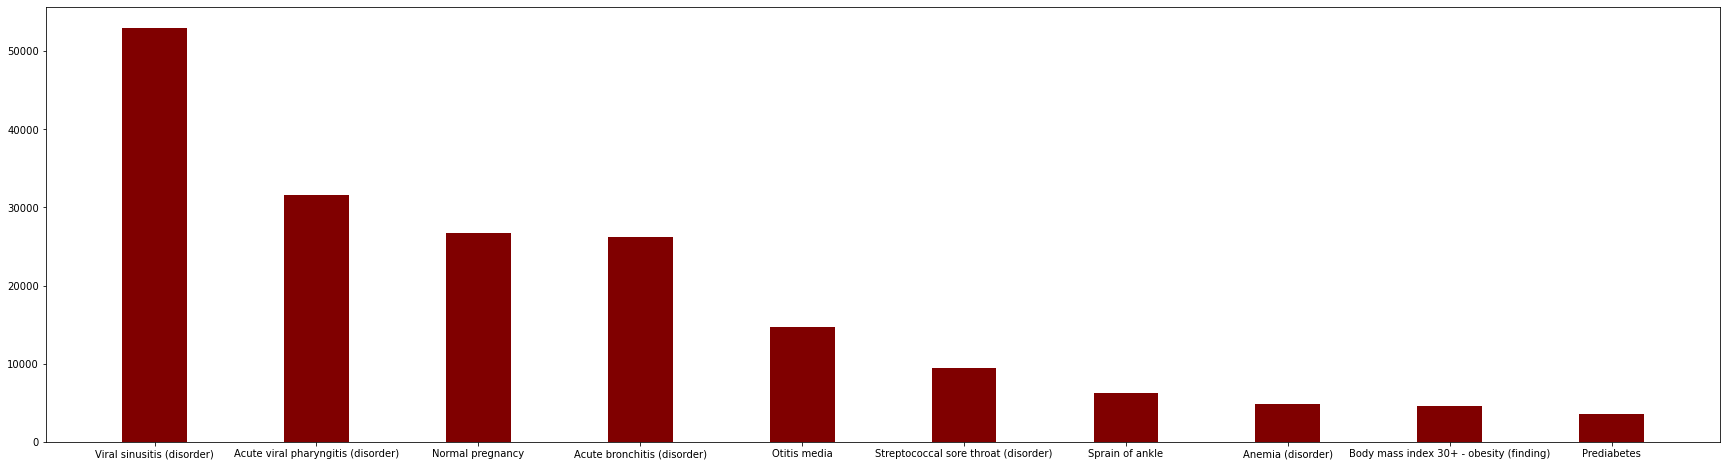

In [72]:
plt.figure(figsize=(30,8))
plt.bar(conditions_cnt.iloc[0:10].index, conditions_cnt.iloc[0:10].values, color='maroon', width=.4)
plt.show()

In [73]:
conditions['duration']=(pd.to_datetime(conditions['STOP'])-pd.to_datetime(conditions['START'])).dt.days

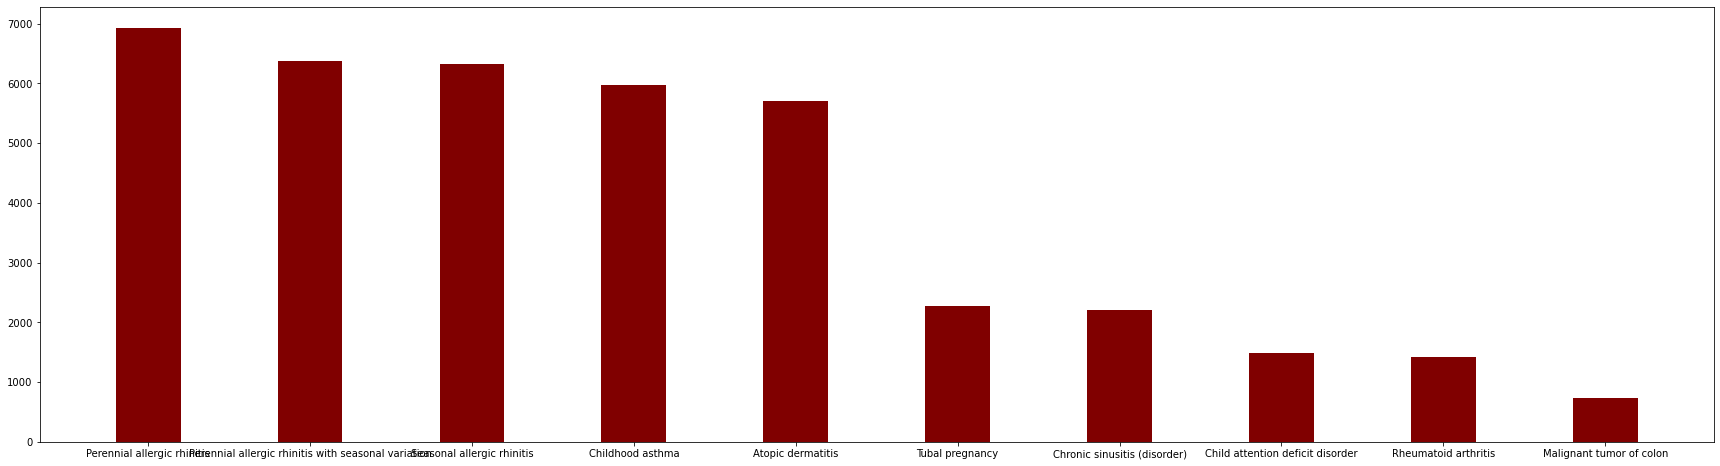

In [74]:
contions_avg = conditions[['DESCRIPTION','duration']].groupby(['DESCRIPTION'])['duration'].mean().sort_values(ascending=False)
plt.figure(figsize=(30,8))
plt.bar(contions_avg.iloc[0:10].index, contions_avg.iloc[0:10].values, color='maroon', width=.4)
plt.show()

# MEDICATION

In [75]:
medications = pd.read_csv("medications.csv")

In [76]:
medications.head()

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,1993-04-29,1993-05-13,2d0a9468-9cc7-47c6-a757-2944fb7a754d,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,4548cd8e-7578-46b5-8028-2b2164b00b6d,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,39.19,0.0,1,39.19,444814009.0,Viral sinusitis (disorder)
1,1996-02-02,1996-02-09,2d0a9468-9cc7-47c6-a757-2944fb7a754d,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,3c6727fd-c572-481c-85ae-9832b147a021,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,64.34,0.0,1,64.34,444814009.0,Viral sinusitis (disorder)
2,1997-04-12,1997-04-26,2d0a9468-9cc7-47c6-a757-2944fb7a754d,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,259ded9d-aaf8-48f9-a32b-c255140c0cd9,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,70.10,0.0,1,70.10,444814009.0,Viral sinusitis (disorder)
3,2000-01-28,2000-02-04,ae1f5428-ed4a-48ee-8444-47db56f71310,4d71f845-a6a9-3c39-b242-14d25ef86a8d,c269ce33-43b7-497b-806d-ccfb4e4194ed,313782,Acetaminophen 325 MG Oral Tablet,6.07,0.0,1,6.07,10509002.0,Acute bronchitis (disorder)
4,1971-07-12,1971-07-19,c51d1f1e-8c6f-49d5-bd9d-871402b8cfef,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,56203e6f-6fe5-4e6a-a37d-e5948624a2d6,313782,Acetaminophen 325 MG Oral Tablet,8.08,0.0,1,8.08,10509002.0,Acute bronchitis (disorder)


In [77]:
 print("Diff number of medicines prescribed: ",len(conditions['CODE'].unique()))

Diff number of medicines prescribed:  155


In [78]:
medications['START'] = pd.to_datetime(medications['START'])
medications['STOP'] = pd.to_datetime(medications['STOP'])
medications['duration']=(pd.to_datetime(medications['STOP'])-pd.to_datetime(medications['START'])).dt.days

In [79]:
medications_avg = medications[['DESCRIPTION','duration']].groupby(['DESCRIPTION'])['duration'].mean().sort_values(ascending=False)

#### Medications avg duration

In [80]:
medications_avg.dropna()

DESCRIPTION
Acetaminophen 325 MG / oxyCODONE Hydrochloride 5 MG Oral Tablet          2885.663082
Acetaminophen 325 MG / HYDROcodone Bitartrate 7.5 MG Oral Tablet         2015.476048
Meperidine Hydrochloride 50 MG Oral Tablet                               1858.609646
atomoxetine 100 MG Oral Capsule                                          1637.090909
Methotrexate 2.5 MG Oral Tablet                                          1522.105263
                                                                            ...     
Tamoxifen 10 MG Oral Tablet                                                 0.000000
5 ML hyaluronidase-oysk 2000 UNT/ML / trastuzumab 120 MG/ML Injection       0.000000
5 ML fulvestrant 50 MG/ML Prefilled Syringe                                 0.000000
5 ML SUFentanil 0.05 MG/ML Injection                                        0.000000
sevoflurane 1000 MG/ML Inhalant Solution                                    0.000000
Name: duration, Length: 135, dtype: float64

#### Medications avg cost

In [81]:
medications_avg_cost = medications[['DESCRIPTION','TOTALCOST']].groupby(['DESCRIPTION'])['TOTALCOST'].mean().sort_values(ascending=False)

In [82]:
medications_avg_cost.dropna()

DESCRIPTION
Sertraline 100 MG Oral Tablet                                                                                        3.627546e+06
10 ML oxaliplatin 5 MG/ML Injection                                                                                  3.067742e+05
Acetaminophen 325 MG / oxyCODONE Hydrochloride 5 MG Oral Tablet                                                      2.390053e+05
Acetaminophen/Hydrocodone                                                                                            1.178735e+05
Pancreatin 600 MG Oral Tablet                                                                                        8.589774e+04
                                                                                                                         ...     
Aspirin 81 MG Oral Tablet                                                                                            8.989858e+00
Acetaminophen 21.7 MG/ML / Dextromethorphan Hydrobromide 1 MG/ML / doxylamine 

#### Average medication cost per patient

In [83]:
medications[['PATIENT','TOTALCOST']].groupby(['PATIENT'])['TOTALCOST'].sum().mean()

126705.23660455285

# PATIENTS DATA

In [84]:
patients = pd.read_csv("patients.csv")

In [85]:
patients.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,NaN,999-17-6800,S99989157,X56122130X,Mr.,Toby274,Weissnat378,NaN,...,Boston Massachusetts US,158 Dickens Run Apt 28,Peabody,Massachusetts,Essex County,1940.0,42.528637,-70.978363,1151953.87,3977.08
1,2d0a9468-9cc7-47c6-a757-2944fb7a754d,2000-09-28,NaN,999-29-7379,S99924139,NaN,Mr.,Don899,Kris249,NaN,...,Boston Massachusetts US,1040 Rogahn Well Apt 6,Norwell,Massachusetts,Plymouth County,NaN,42.137960,-70.790171,451545.13,5476.16
2,600960a6-6ed0-4bc3-8476-1143c592ea66,1992-03-27,NaN,999-41-4930,S99998113,X25829057X,Mrs.,Angel97,Hills818,NaN,...,Everett Massachusetts US,407 Miller Viaduct,Milford,Massachusetts,Worcester County,1757.0,42.158390,-71.498743,691163.42,4532.12
3,c51d1f1e-8c6f-49d5-bd9d-871402b8cfef,1971-04-12,NaN,999-84-8250,S99971054,X76340224X,Mr.,Dewey930,Casper496,NaN,...,Boston Massachusetts US,731 Ortiz Mission,Raynham,Massachusetts,Bristol County,NaN,41.892941,-71.028152,1137246.54,9203.24
4,923d8804-2ccb-4281-952f-bc20f2615b02,1955-07-19,NaN,999-83-2850,S99922370,X55840593X,Mrs.,Renna830,Bartell116,NaN,...,Shrewsbury Massachusetts US,615 Cronin Drive Apt 90,Lynn,Massachusetts,Essex County,1906.0,42.510862,-70.922186,1507389.72,25363.46


In [86]:
patients.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')

In [87]:
dead = patients['DEATHDATE'].notnull().sum()
alive = patients['DEATHDATE'].isnull().sum()

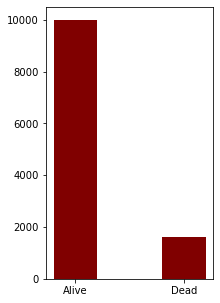

In [88]:
plt.figure(figsize=(3,5))
plt.bar(['Alive', 'Dead'], [alive, dead], color='maroon', width=.4)
plt.show()

### OBSERVATIONS

In [107]:
observations = pd.read_csv("observations.csv")
observations.columns

Index(['DATE', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION', 'VALUE', 'UNITS',
       'TYPE'],
      dtype='object')

In [108]:
pd.DataFrame(index=observations.DESCRIPTION.value_counts().index, data=observations.DESCRIPTION.value_counts().values)

,0
Pain severity - 0-10 verbal numeric rating [Score] - Reported,620454
Systolic Blood Pressure,574419
Diastolic Blood Pressure,574419
Body Height,566343
Body Weight,566343
Respiratory rate,566343
Tobacco smoking status NHIS,566343
Heart rate,566343
QOLS,499060
DALY,499060


In [106]:
pd.merge(conditions[conditions['DESCRIPTION'] == 'Prediabetes'], observations, left_on=['PATIENT','ENCOUNTER'], right_on=['PATIENT','ENCOUNTER']).CODE_y.value_counts()

4548-4     3556
72514-3    3506
29463-7    3500
39156-5    3500
72166-2    3500
8302-2     3500
9279-1     3500
8867-4     3500
8480-6     3500
8462-4     3500
2085-9     1321
2093-3     1321
18262-6    1321
2571-8     1321
21000-5    1087
6690-2     1087
787-2      1087
789-8      1087
32623-1    1087
786-4      1087
777-3      1087
718-7      1087
32207-3    1087
785-6      1087
4544-3     1086
2069-3      327
2339-0      327
38483-4     327
2947-0      327
6299-2      327
20565-8     327
33914-3     327
6298-4      327
49765-1     327
14959-1     280
59576-9     220
19926-5      59
5767-9       46
1742-6       24
1751-7       24
2885-2       24
1920-8       24
10834-0      24
1975-2       24
6768-6       24
5770-3       23
20454-5      23
5811-5       23
5797-6       23
5778-6       23
5803-2       23
32167-9      23
5804-0       23
5802-4       23
5792-7       23
25428-4      23
2514-8       23
5799-2       23
20505-4      23
5794-3       23
8310-5       14
57905-2       3
33756-8 